# MOVIE RECOMMENDER SYSTEM using Latest TMDB 3000+ Movie Dataset

#### 2023 New Updated - Kaggle

## Libraries and Data Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
%matplotlib inline

In [2]:
movie_df = pd.read_csv("Movies_dataset_2023.csv")
movie_df.head(5)

,Movie_Name,Certification,Release_Date,Genres,Language,Budget,Revenue,Runtime
0,Black Panther: Wakanda Forever,PG13,11/10/2022,"['Action,', 'Adventure,', 'Science Fiction']",English,"$250,000,000.00","$835,000,000.00",162.0
1,Puss in Boots: The Last Wish,PG,12/08/2022,"['Animation,', 'Adventure,', 'Comedy,', 'Famil...",English,"$90,000,000.00","$369,105,725.00",103.0
2,Shotgun Wedding,R,12/28/2022,"['Action,', 'Romance,', 'Comedy']",English,-,"$4,495,365.00",101.0
3,M3GAN,PG13,01/05/2023,"['Science Fiction,', 'Horror,', 'Comedy']",English,"$12,000,000.00","$158,000,000.00",102.0
4,Transfusion,MA15+,01/05/2023,"['Crime,', 'Thriller,', 'Drama']",English,-,-,105.0


In [3]:
movie_df.shape

(3966, 8)

In [4]:
movie_df.describe()

,Runtime
count,3702.000000
mean,105.704754
std,21.589413
min,61.000000
25%,91.000000
50%,102.000000
75%,116.000000
max,248.000000


In [5]:
movie_df.tail(5)

,Movie_Name,Certification,Release_Date,Genres,Language,Budget,Revenue,Runtime
3961,The Watch,R,08/23/2012,"['Comedy,', 'Action,', 'Science Fiction']",English,"$68,000,000.00","$68,267,862.00",102.0
3962,Primeval,R,01/12/2007,"['Adventure,', 'Horror']",English,-,"$10,597,734.00",93.0
3963,The Girl in the Spider's Web,R,11/09/2018,"['Action,', 'Crime,', 'Thriller,', 'Drama']",English,"$43,000,000.00","$35,164,920.00",115.0
3964,Scooby-Doo on Zombie Island,PG,09/22/1998,"['Animation,', 'Mystery,', 'Family,', 'Horror']",English,-,-,77.0
3965,Wu Kong,NaN,07/13/2017,"['Fantasy,', 'Action,', 'Adventure']",Released,Language,-,130.0


In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Name     3966 non-null   object 
 1   Certification  3697 non-null   object 
 2   Release_Date   3966 non-null   object 
 3   Genres         3966 non-null   object 
 4   Language       3966 non-null   object 
 5   Budget         3966 non-null   object 
 6   Revenue        3966 non-null   object 
 7   Runtime        3702 non-null   float64
dtypes: float64(1), object(7)
memory usage: 248.0+ KB


In [7]:
# Convert Release_Date to datetime type
movie_df['Release_Date'] = pd.to_datetime(movie_df['Release_Date'])

In [8]:
# Define a function to clean and convert to numeric
def clean_and_convert(value):
    cleaned_value = str(value).replace(',', '').replace('$', '')
    if cleaned_value.isdigit():
        return float(cleaned_value)
    else:
        return None

In [9]:
# Apply the cleaning and conversion function to Budget and Revenue columns
movie_df['Budget'] = movie_df['Budget'].apply(clean_and_convert)
movie_df['Revenue'] = movie_df['Revenue'].apply(clean_and_convert)

In [10]:
# Impute missing Runtime values with the median runtime
median_runtime = movie_df['Runtime'].median()
movie_df['Runtime'].fillna(median_runtime, inplace=True)

In [11]:
# Print cleaned DataFrame information
print(movie_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966 entries, 0 to 3965
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Movie_Name     3966 non-null   object        
 1   Certification  3697 non-null   object        
 2   Release_Date   3966 non-null   datetime64[ns]
 3   Genres         3966 non-null   object        
 4   Language       3966 non-null   object        
 5   Budget         2 non-null      float64       
 6   Revenue        0 non-null      object        
 7   Runtime        3966 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 248.0+ KB
None


## Data Exploration and Visualization

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:1

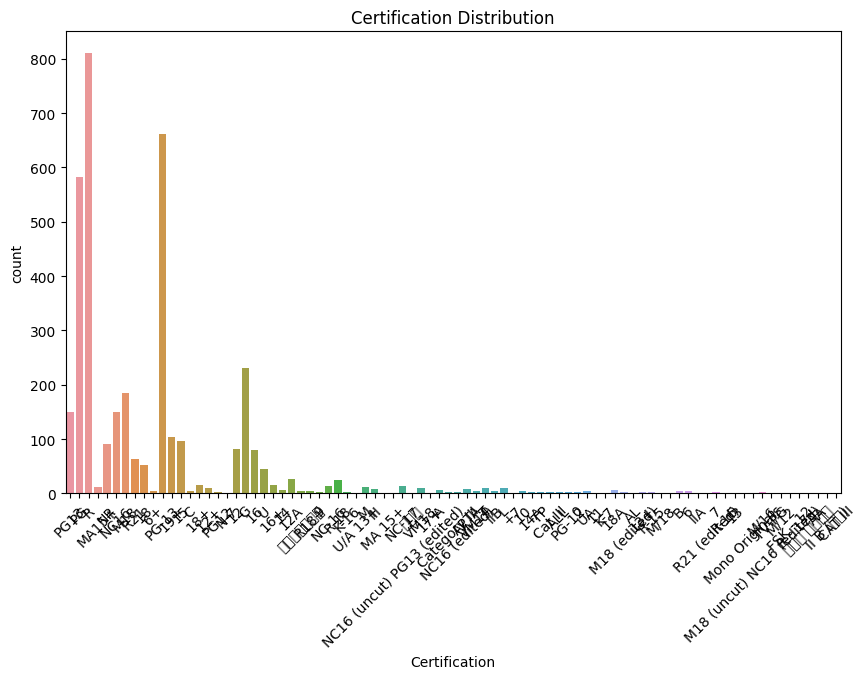

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Certification', data=movie_df)
plt.title("Certification Distribution")
plt.xticks(rotation=45)
plt.show()

## Calculate movie similarity using Cosine Similarity

In [13]:
# Calculate cosine similarity between movie genres
movie_genres = movie_df['Genres'].str.split(', ', expand=True)
movie_genres.fillna('', inplace=True)
movie_matrix = pd.get_dummies(movie_genres, prefix_sep='', prefix='').groupby(level=0, axis=1).sum()
cosine_sim = cosine_similarity(movie_matrix, movie_matrix)

In [14]:
movie_genres

,0,1,2,3,4,5,6,7,8
0,"['Action,'","'Adventure,'",'Science Fiction'],,,,,,
1,"['Animation,'","'Adventure,'","'Comedy,'","'Family,'",'Fantasy'],,,,
2,"['Action,'","'Romance,'",'Comedy'],,,,,,
3,"['Science Fiction,'","'Horror,'",'Comedy'],,,,,,
4,"['Crime,'","'Thriller,'",'Drama'],,,,,,
...,...,...,...,...,...,...,...,...,...
3961,"['Comedy,'","'Action,'",'Science Fiction'],,,,,,
3962,"['Adventure,'",'Horror'],,,,,,,
3963,"['Action,'","'Crime,'","'Thriller,'",'Drama'],,,,,
3964,"['Animation,'","'Mystery,'","'Family,'",'Horror'],,,,,


In [15]:
movie_matrix

,,'Action'],"'Action,'",'Adventure'],"'Adventure,'",'Animation'],"'Animation,'",'Comedy'],"'Comedy,'",'Crime'],...,['Romance'],"['Romance,'",['Science Fiction'],"['Science Fiction,'","['TV Movie,'",['Thriller'],"['Thriller,'","['War,'",['Western'],"['Western,'"
0,6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3962,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3963,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3964,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
cosine_sim

array([[1.        , 0.8735707 , 0.94871795, ..., 0.9217866 , 0.89205155,
        0.92307692],
       [0.8735707 , 1.        , 0.83862787, ..., 0.8104409 , 0.89148499,
        0.83862787],
       [0.94871795, 0.83862787, 1.        , ..., 0.9217866 , 0.89205155,
        0.92307692],
       ...,
       [0.9217866 , 0.8104409 , 0.9217866 , ..., 1.        , 0.86206897,
        0.89205155],
       [0.89205155, 0.89148499, 0.89205155, ..., 0.86206897, 1.        ,
        0.89205155],
       [0.92307692, 0.83862787, 0.92307692, ..., 0.89205155, 0.89205155,
        1.        ]])

In [17]:
# User input for movie title
movie_title = input("Enter a movie title: ")

Enter a movie title: The Adam Project


In [ ]:
# Find similar movies
# Find the closest matching movie title
matching_titles = movie_df[movie_df['Movie_Name'].str.contains(movie_title, case=False)]['Movie_Name']

if len(matching_titles) == 0:
    print("Movie not found. Please enter a valid movie title.")
    movie_title = input("Enter a movie title: ")
else:
    matched_movie = matching_titles.iloc[0]  # Get the first matching title
    movie_idx = movie_df[movie_df['Movie_Name'] == matched_movie].index[0]
    similar_movies = list(enumerate(cosine_sim[movie_idx]))
    similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)

In [ ]:
# Recommender System Output
print(f"Recommended movies for {movie_title}:")
for idx, _ in similar_movies[:10]:
    print(movie_df.iloc[idx]['Movie_Name'])

# Split data into train and test sets
train, test = train_test_split(movie_df, test_size=0.2, random_state=42)

# Build and train a simple neural network for movie recommendations
num_users = len(movie_df['Movie_Name'].unique())
num_movies = len(movie_df['Movie_Name'].unique())

model = Sequential([
    Embedding(num_users, 50, input_length=1),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(num_movies, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prepare training data
X_train = train['User_ID']  # Replace 'User_ID' with the actual column name
y_train = train['Movie_ID']  # Replace 'Movie_ID' with the actual column name

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)

# Get recommendations for a user
user_id = 23982  # Replace with a valid user ID
user_movies = movie_df[movie_df['User_ID'] == user_id]['Movie_ID'].values
user_movie_idx = np.random.choice(user_movies, size=1)[0]
recommendations = model.predict(np.array([user_movie_idx]))

# Display recommended movies
recommended_movie_idx = np.argmax(recommendations)
recommended_movie = movie_df[movie_df['Movie_ID'] == recommended_movie_idx]['Movie_Name'].values[0]
print(f"Recommended movie for user {user_id}: {recommended_movie}")


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Generate a new user ID
new_user_id = np.max(movie_df.index) + 1

# User input for movie title
movie_title = input("Enter a movie title: ")

# Find the closest matching movie title
matching_titles = movie_df[movie_df['Movie_Name'].str.contains(movie_title, case=False)]['Movie_Name']

if len(matching_titles) == 0:
    print("Movie not found. Please enter a valid movie title.")
else:
    matched_movie = matching_titles.iloc[0]  # Get the first matching title
    movie_idx = movie_df[movie_df['Movie_Name'] == matched_movie].index[0]
    similar_movies = list(enumerate(cosine_sim[movie_idx]))
    similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)
    

    # Split data into train and test sets
    train, test = train_test_split(movie_df, test_size=0.2, random_state=42)

    # Build and train a simple neural network for movie recommendations
    num_users = len(movie_df.index) + 1
    num_movies = len(movie_df.index)

    model = Sequential([
        Embedding(num_users, 50, input_length=1),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(num_movies, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Prepare training data
    X_train = train.index.values
    y_train = train.index.values

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)

    # Get recommendations for a user
    user_movie_idx = np.random.choice(movie_df.index.values, size=1)[0]
    recommendations = model.predict(np.array([[new_user_id]]))

    # Display recommended movie
    recommended_movie_idx = np.argmax(recommendations)
    recommended_movie = movie_df.iloc[recommended_movie_idx]['Movie_Name']
    print(f"Recommended movie for user {new_user_id}: {recommended_movie}")


Enter a movie title: The Adam Project
Epoch 1/5
50/50 [==============================] - 2s 18ms/step - loss: 8.2943 - accuracy: 0.0000e+00
Epoch 2/5
50/50 [==============================] - 0s 9ms/step - loss: 8.2583 - accuracy: 0.0306
Epoch 3/5
50/50 [==============================] - 0s 9ms/step - loss: 8.1649 - accuracy: 0.0467
Epoch 4/5
50/50 [==============================] - 0s 9ms/step - loss: 7.9474 - accuracy: 0.0700
Epoch 5/5
1/1 [==============================] - 0s 336ms/step
Recommended movie for user 3966: My Student's Mom
